<a href="https://colab.research.google.com/github/yForecasting/intro_python/blob/main/tutorials/Movie_Analysis_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science with Python

## Project: Movie analysis
Here we review the Top Rated Movies Dataset (IMDB) with Python: Exploratory Data Analysis and Outliers Detection.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

### Load the data

In [13]:
# local file: movies_data = pd.read("movies.csv")
# remote file
url = 'https://github.com/yForecasting/intro_python/raw/main/datasets/movies.csv'
movies_data  = pd.read_csv(url)

### Inspect the data

In [14]:
movies_data.head()

,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
0,0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,23-09-1994,62.636,8.7,21456
1,1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...",20-10-1995,19.097,8.7,3652
2,2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",14-03-1972,57.656,8.7,15990
3,3,424,Schindler's List,The true story of how businessman Oskar Schind...,30-11-1993,41.077,8.6,12778
4,4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,20-12-1974,46.655,8.6,9640


In [15]:
movies_data.tail()

,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
8555,8555,8457,Drillbit Taylor,Three kids hire a low-budget bodyguard to prot...,04-02-2008,9.382,5.7,827
8556,8556,445583,It's All About Karma,"Giacomo befriends a con man, believing that he...",09-03-2017,5.406,5.7,250
8557,8557,411873,The Little Hours,"Garfagnana, Italy, 1347. The handsome servant ...",30-06-2017,23.265,5.7,419
8558,8558,227783,The Nut Job,"Surly, a curmudgeon, independent squirrel is b...",17-01-2014,17.392,5.7,794
8559,8559,446170,Black Tide,When a teenager suddenly disappears without a ...,18-07-2018,6.485,5.7,225


In [16]:
movies_data.shape

(8560, 8)

In [17]:
movies_data.columns

Index(['Unnamed: 0', 'id', 'title', 'overview', 'release_date', 'popularity',
       'vote_average', 'vote_count'],
      dtype='object')

### Fix the data

In [19]:
movies_data = movies_data.drop(['Unnamed: 0', 'id'], axis = 1)

### Inspect the data further

In [20]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8560 entries, 0 to 8559
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         8560 non-null   object 
 1   overview      8556 non-null   object 
 2   release_date  8560 non-null   object 
 3   popularity    8560 non-null   float64
 4   vote_average  8560 non-null   float64
 5   vote_count    8560 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 401.4+ KB


In [22]:
movies_data.describe()

,popularity,vote_average,vote_count
count,8560.000000,8560.000000,8560.000000
mean,34.483893,6.803832,1663.763201
std,259.280939,0.632387,2777.837511
min,0.600000,5.700000,198.000000
25%,8.350000,6.300000,327.000000
50%,11.703000,6.700000,625.000000
75%,21.335250,7.300000,1619.250000
max,11288.261000,8.700000,31575.000000


### Review faulty data

In [23]:
movies_data.isnull().sum()

title           0
overview        4
release_date    0
popularity      0
vote_average    0
vote_count      0
dtype: int64

In [24]:
movies_data = movies_data.drop(['overview'],axis=1)

In [25]:
movies_data.isnull().sum()

title           0
release_date    0
popularity      0
vote_average    0
vote_count      0
dtype: int64

In [26]:
movies_data.duplicated().sum()

0

### Split Date information

In [28]:
new_col = movies_data["release_date"].str.split("-",n=2,expand=True)
movies_data["day"]=new_col[0]
movies_data["month"]=new_col[1]
movies_data["year"]=new_col[2]

In [29]:
movies_data.head()

,title,release_date,popularity,vote_average,vote_count,day,month,year
0,The Shawshank Redemption,23-09-1994,62.636,8.7,21456,23,09,1994
1,Dilwale Dulhania Le Jayenge,20-10-1995,19.097,8.7,3652,20,10,1995
2,The Godfather,14-03-1972,57.656,8.7,15990,14,03,1972
3,Schindler's List,30-11-1993,41.077,8.6,12778,30,11,1993
4,The Godfather: Part II,20-12-1974,46.655,8.6,9640,20,12,1974


### Zoom in on the votes

In [30]:
movies_data.nunique()

title           8307
release_date    5601
popularity      7134
vote_average      31
vote_count      3075
day               31
month             12
year             109
dtype: int64

In [31]:
movies_data['vote_average'].unique()

array([8.7, 8.6, 8.5, 8.4, 8.3, 8.2, 8.1, 8. , 7.9, 7.8, 7.7, 7.6, 7.5,
       7.4, 7.3, 7.2, 7.1, 7. , 6.9, 6.8, 6.7, 6.6, 6.5, 6.4, 6.3, 6.2,
       6.1, 6. , 5.9, 5.8, 5.7])

In [32]:
movies_data['vote_average'].value_counts()

6.7    478
6.4    475
6.5    469
6.6    465
6.8    445
6.1    445
6.3    434
6.2    427
6.9    411
7.2    408
7.0    407
7.1    399
6.0    390
7.4    364
7.3    357
5.9    354
7.5    344
5.8    294
7.6    231
7.7    198
7.8    177
7.9    154
8.0    122
8.1     82
8.2     66
5.7     54
8.3     47
8.4     35
8.5     21
8.6      4
8.7      3
Name: vote_average, dtype: int64

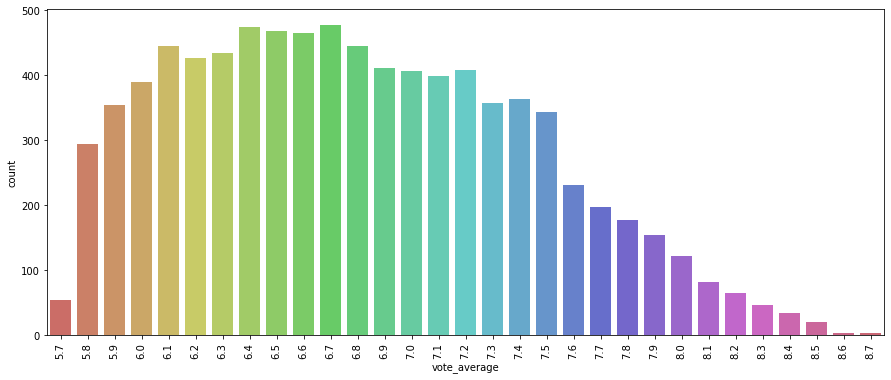

In [34]:
plt.figure(figsize=(15,6))
sns.countplot('vote_average',data=movies_data,
              palette='hls')
plt.xticks(rotation=90)
plt.show()

In [35]:
import plotly.express as px

In [36]:
fig1 = px.histogram(movies_data, x='vote_average',
                    color='vote_average')
fig1.show()

### Zoom in on the popularity of movies

In [37]:
movie_popularity = movies_data.copy()

In [38]:
movie_popularity = movie_popularity.sort_values(by='popularity',
                                                ascending=False)

In [39]:
movie_popularity.head()

,title,release_date,popularity,vote_average,vote_count,day,month,year
4238,The Lost City,24-03-2022,11288.261,6.7,768,24,03,2022
6238,Morbius,30-03-2022,11236.546,6.3,1125,30,03,2022
1400,The Northman,07-04-2022,7895.411,7.5,1095,07,04,2022
703,Sonic the Hedgehog 2,30-03-2022,7088.307,7.8,1622,30,03,2022
638,The Batman,01-03-2022,6372.913,7.8,4767,01,03,2022


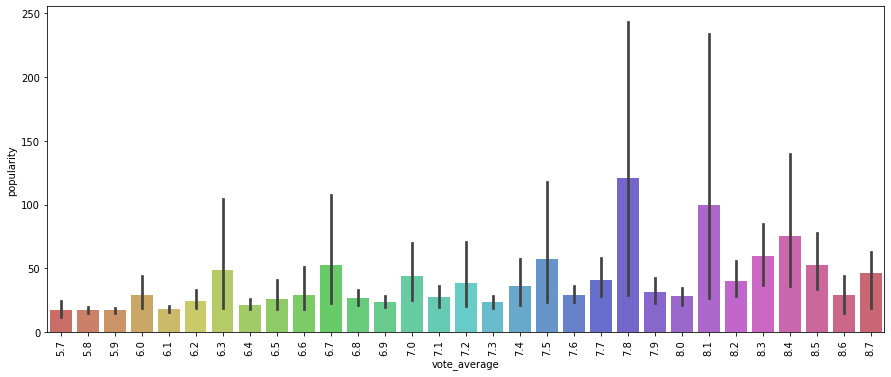

In [40]:
plt.figure(figsize=(15,6))
sns.barplot(x='vote_average',y='popularity',
            data=movie_popularity, palette='hls')
plt.xticks(rotation=90)
plt.show()

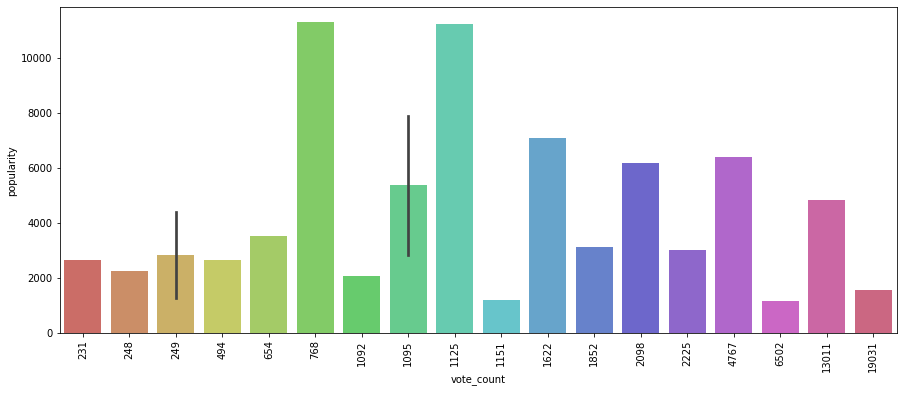

In [41]:
# Top 20 movies
plt.figure(figsize=(15,6))
sns.barplot(x='vote_count',y='popularity',
            data=movie_popularity.head(20), palette='hls')
plt.xticks(rotation=90)
plt.show()

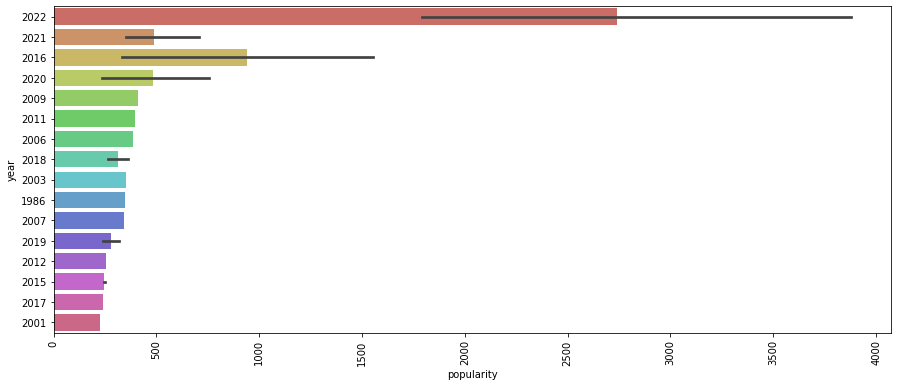

In [44]:
# Top 100 movies by year
plt.figure(figsize=(15,6))
sns.barplot(y='year',x='popularity',
            data=movie_popularity.head(100), palette='hls')
plt.xticks(rotation=90)
plt.show()

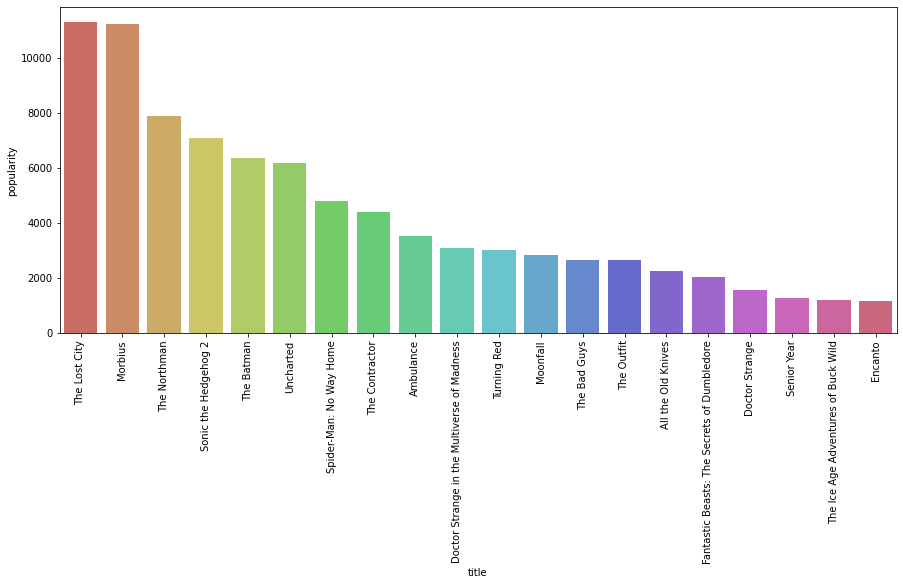

In [45]:
# Top 20 movies with title
plt.figure(figsize=(15,6))
sns.barplot(x='title',y='popularity',
            data=movie_popularity.head(20), palette='hls')
plt.xticks(rotation=90)
plt.show()